# Tarea5

Claudio Pierard @miguelraz
 
Miguel Raz @cpierard

**Envío del PR inicial:** lunes 17 de octubre

**Aceptación del PR:** lunes 31 de octubre

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [12]:
using Plots

using LaTeXStrings

pyplot(grid=:false, legend=:false, size=(400,267))

Plots.PyPlotBackend()

In [13]:
Q_c(x,c) = x^2 + c
Q_c´(x) = 2*x

Q_c´ (generic function with 1 method)

In [14]:
function iterator(f::Function, n::Int, k, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [15]:
function lyapunov_exponent(Xi)
    
    σ = 0.0
    n = length(Xi)
    
    for i in 1:n
        
        σ += log(abs(Q_c´(Xi[i])))
        
    end
    
    λ = 1/n * σ
    
end

lyapunov_exponent (generic function with 1 method)

In [16]:
orb_1 = iterator(Q_c, 100, 1000, 0.0, -1.5)

1000-element Array{Float64,1}:
 -0.248334 
 -1.43833  
  0.568794 
 -1.17647  
 -0.115911 
 -1.48656  
  0.709875 
 -0.996078 
 -0.507829 
 -1.24211  
  0.0428369
 -1.49817  
  0.744498 
  ⋮        
 -0.0567696
 -1.49678  
  0.740342 
 -0.951894 
 -0.593898 
 -1.14728  
 -0.183738 
 -1.46624  
  0.649861 
 -1.07768  
 -0.338604 
 -1.38535  

In [17]:
lyapunov_exponent(orb_1) # Caos

0.25999766464274

In [18]:
orb_2 = iterator(Q_c, 100, 1000, 0.0, -1.2)
lyapunov_exponent(orb_2) #no chaos

-0.11157177942474457

In [19]:
orb_3 = iterator(Q_c, 15000, 14500, 0.0, -1.401)
lia_3 = lyapunov_exponent(orb_3) #no chaos

-0.018692862862578284

In [20]:
function lyapunov_c_range(c_range)
    
    lyapunov = Float64[]
    
    for i in c_range
        
        orb = iterator(Q_c, 100, 1000, 0.0, i)
        exponent = lyapunov_exponent(orb)
        push!(lyapunov, exponent)
        
    end
    
    lyapunov
    
end     

lyapunov_c_range (generic function with 1 method)

In [21]:
c_rango = 0.25:-0.001:-2.0
liap_exponentes = lyapunov_c_range(c_rango);


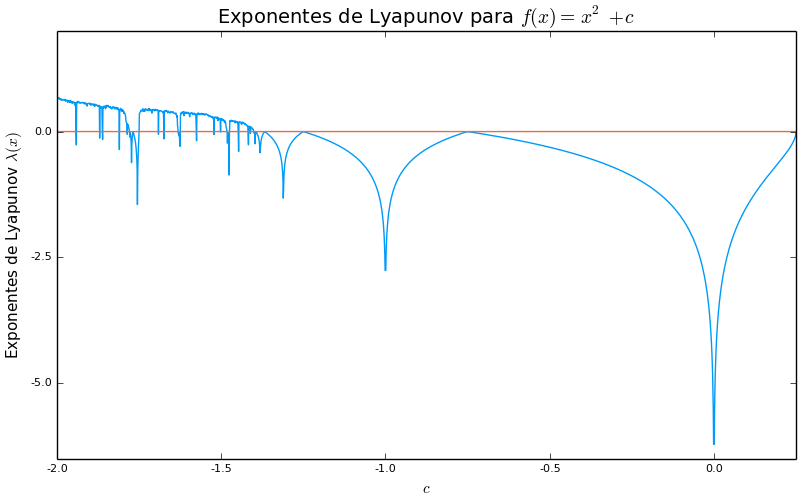

In [22]:
plot(c_rango, liap_exponentes, ylim=(-6.5, 2), size=(800, 500), xlabel=(L"$c$"), 
    ylabel = (L"Exponentes de Lyapunov $\lambda(x)$"),
    title=(L"Exponentes de Lyapunov para $f(x) = \ x^2 + c$"))

plot!(c_rango, zeros(length(liap_exponentes)))

**Respuesta**

> Observamos que para valores de c donde hay bifurcaciones se alcanza el valor 0. Esto se debe a que las derivadas se van acercando a cero justo antes de darse el punto de bifurcación, y ahi justo se ve un 'pico', en esencia las dos derivadas correspondientes a la bifurcación.

> Sin embargo, en los ciclos superestables vemos que hay una brutal tendencia hacia $-\infty$ en los valores de los exponentes -- esto lo podemos atribuir a que los sitios que rodean acaban siendo atraídos.

**Ejercicio 2:**

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.)

**Ejercicio 3:**

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


**Ejercicio 4:**

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

**Ejercicio 5:**

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, ayuden al método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)